# Import các thư viện

In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from ucimlrepo import fetch_ucirepo
from graphviz import Source
from IPython.display import display, Image
import seaborn as sns

# Heart Desease Dataset

## 1. Chuẩn bị dataset

### 1.1. Train và test dataset

In [14]:
# Fetch Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)

# Extract features and labels
features = heart_disease.data.features.values
labels = np.ravel(heart_disease.data.targets)

# Convert labels to binary: 0 (no disease), 1 (disease)
labels_binary = np.where(labels > 0, 1, 0)

# Handle missing values
data = pd.concat([pd.DataFrame(features, columns=heart_disease.data.features.columns), pd.Series(labels_binary, name='num')], axis=1)
data = data.dropna().reset_index(drop=True)
features = data.iloc[:, :-1].values
labels_binary = data.iloc[:, -1].values

# Encode the target variable (though not strictly necessary for binary 0/1)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_binary)

# Define class names for binary classification
class_names = ['No Disease', 'Disease']

# Define train/test split proportions
split_ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]

subsets = []

for split_ratio in split_ratios:
    feature_train, feature_test, label_train, label_test = train_test_split(
        features, labels_encoded, test_size=split_ratio[1], random_state=42, stratify=labels_encoded
    )
    
    subsets.append({
        'feature_train': feature_train,
        'label_train': label_train,
        'feature_test': feature_test,
        'label_test': label_test
    })

### 1.2. Visualization

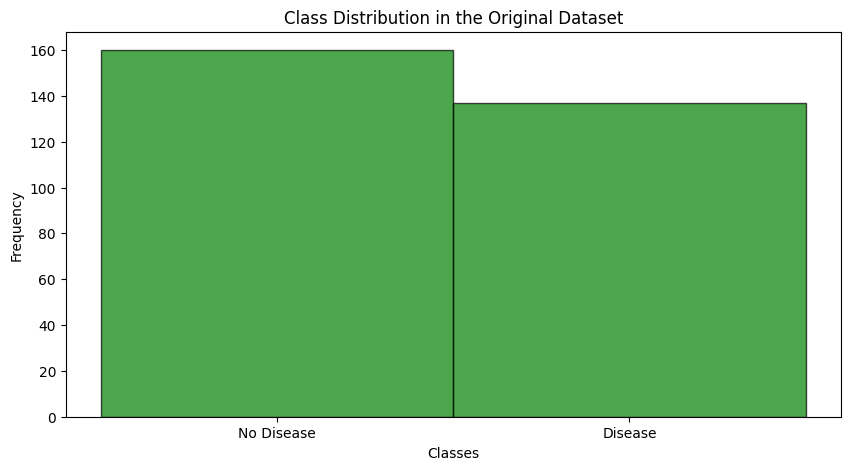

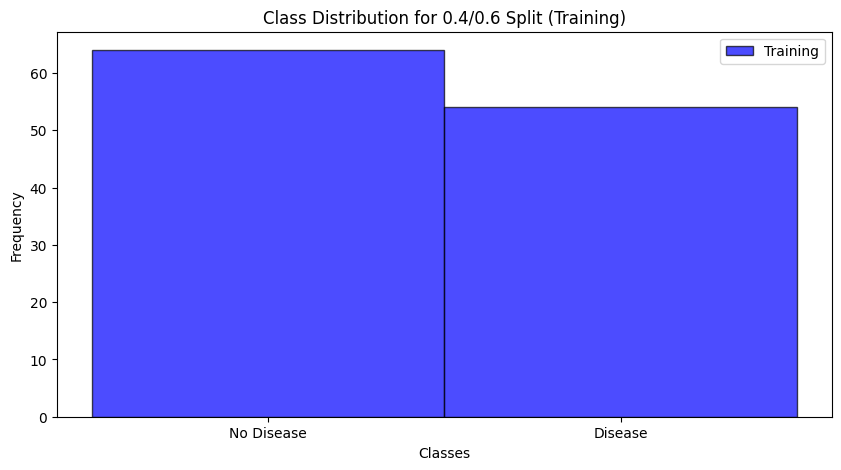

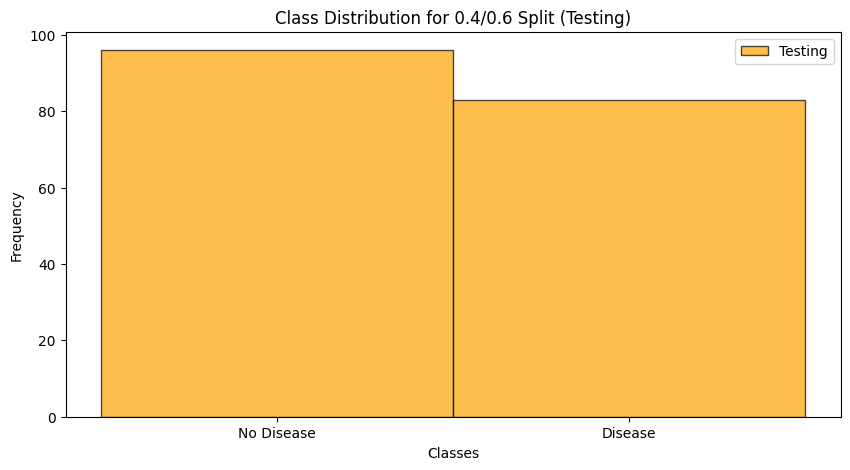

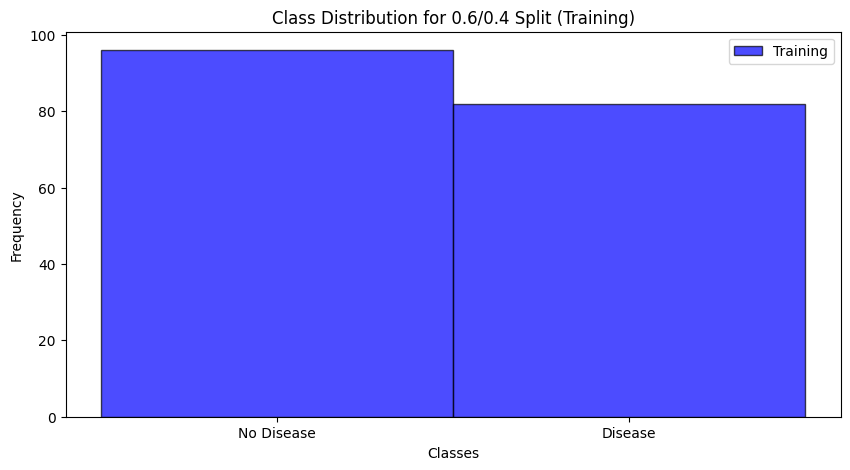

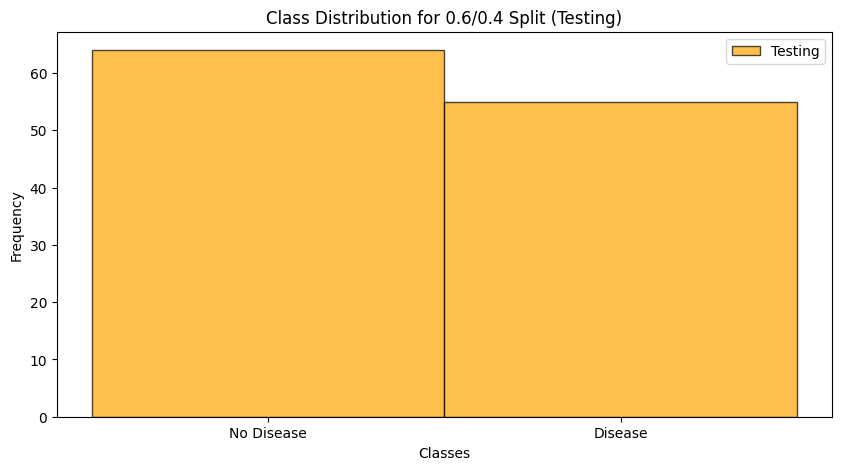

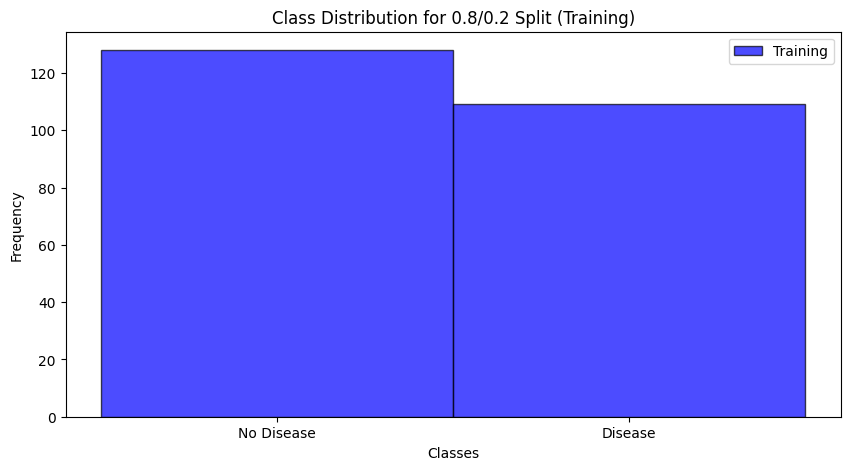

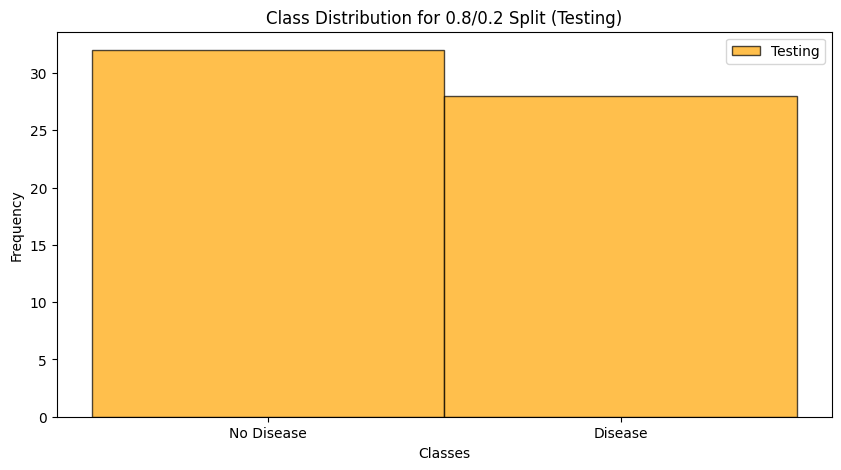

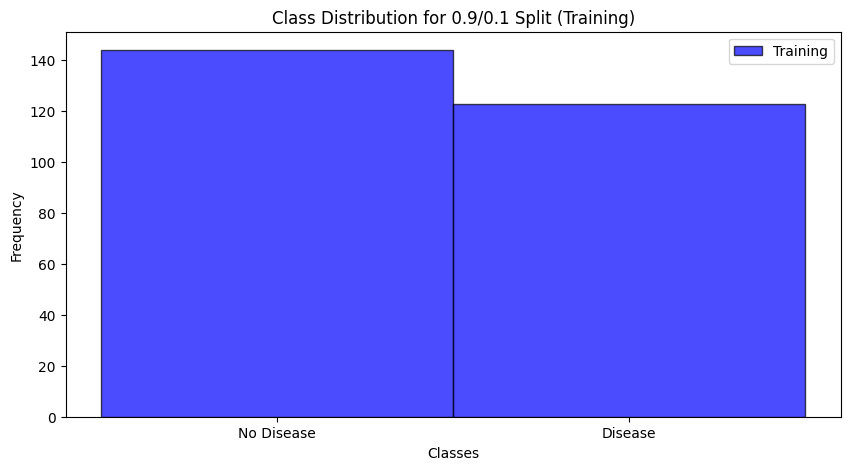

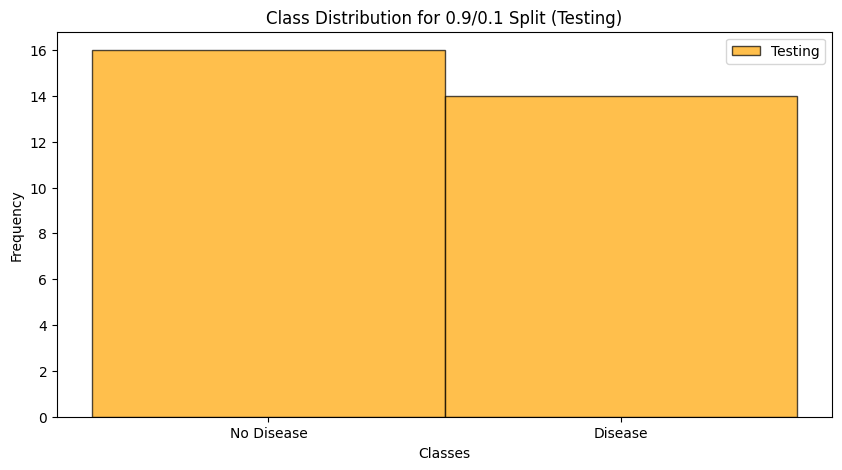

In [15]:
# Visualize the class distribution in the original dataset
plt.figure(figsize=(10, 5))
bins = np.arange(len(np.unique(labels_encoded)) + 1) - 0.5
plt.hist(labels_encoded, bins=bins, color="green", alpha=0.7, edgecolor="black")
plt.title("Class Distribution in the Original Dataset")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.xticks(np.arange(len(class_names)), class_names)
plt.show()

# Visualize distributions for each train/test split
for i in range(len(subsets)):
    label_train = subsets[i]['label_train']
    label_test = subsets[i]['label_test']

    bins = np.arange(len(np.unique(labels_encoded)) + 1) - 0.5
    
    plt.figure(figsize=(10, 5))
    plt.hist(label_train, bins=bins, color="blue", alpha=0.7, edgecolor="black", label="Training")
    plt.title(f"Class Distribution for {split_ratios[i][0]}/{split_ratios[i][1]} Split (Training)")
    plt.xlabel("Classes")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(len(class_names)), class_names)
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.hist(label_test, bins=bins, color="orange", alpha=0.7, edgecolor="black", label="Testing")
    plt.title(f"Class Distribution for {split_ratios[i][0]}/{split_ratios[i][1]} Split (Testing)")
    plt.xlabel("Classes")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(len(class_names)), class_names)
    plt.legend()
    plt.show()

## 2. Xây dựng Decision Tree

### 2.1. Train model

In [16]:
# Train and evaluate the Decision Tree model using Entropy (Information Gain)
models = []
for i, subset in enumerate(subsets):
    feature_train = subset['feature_train']
    label_train = subset['label_train']
    # model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5, class_weight='balanced')
    model = DecisionTreeClassifier(criterion='entropy', random_state=42)
    model.fit(feature_train, label_train)
    models.append(model)

### 2.2. Visualization

Decision tree of the model trained with split ratio 0.4/0.6


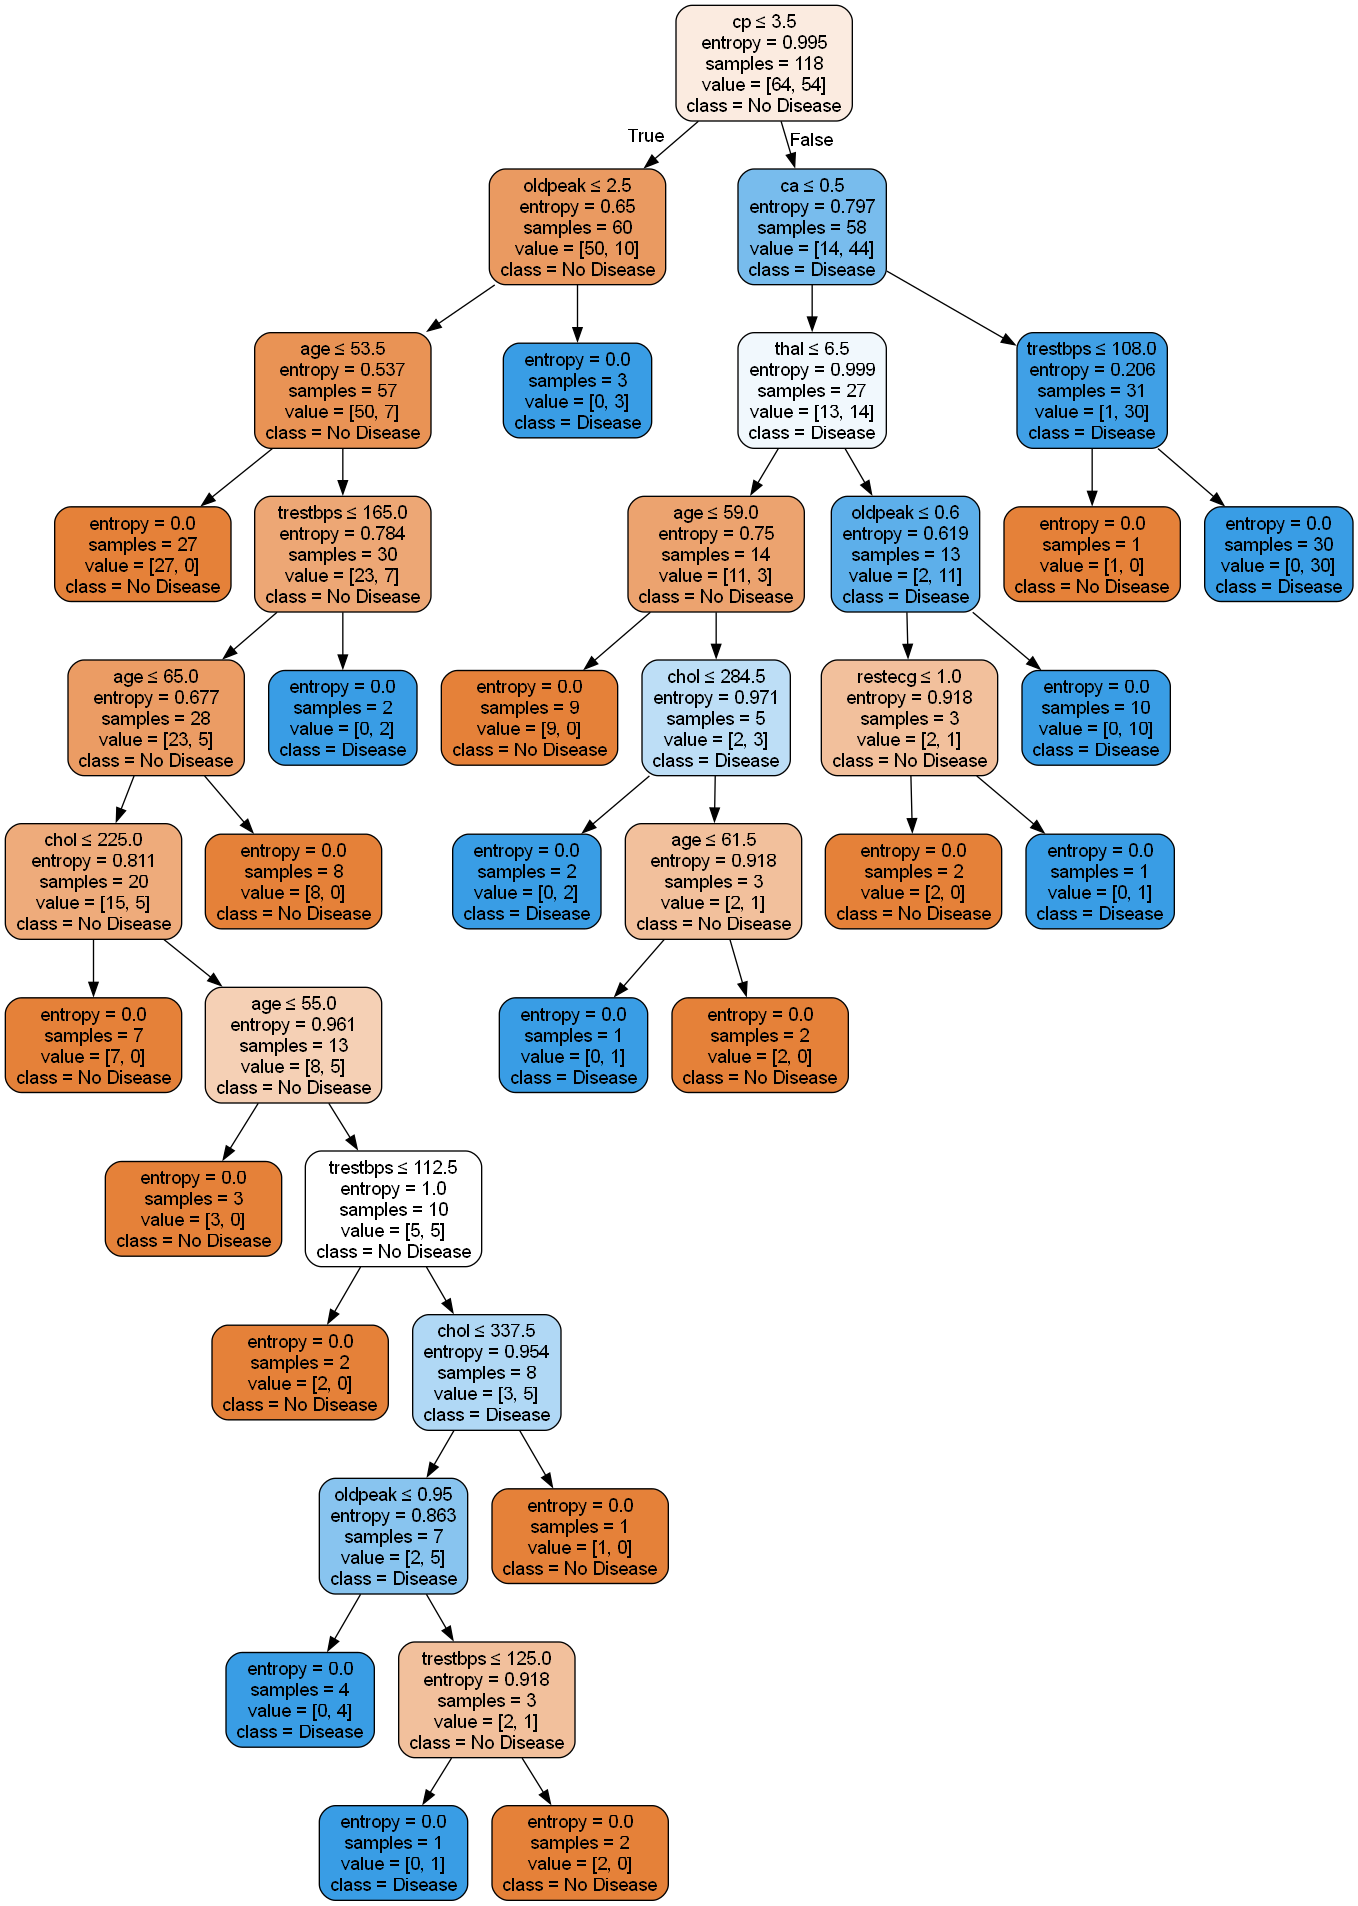

Decision tree of the model trained with split ratio 0.6/0.4


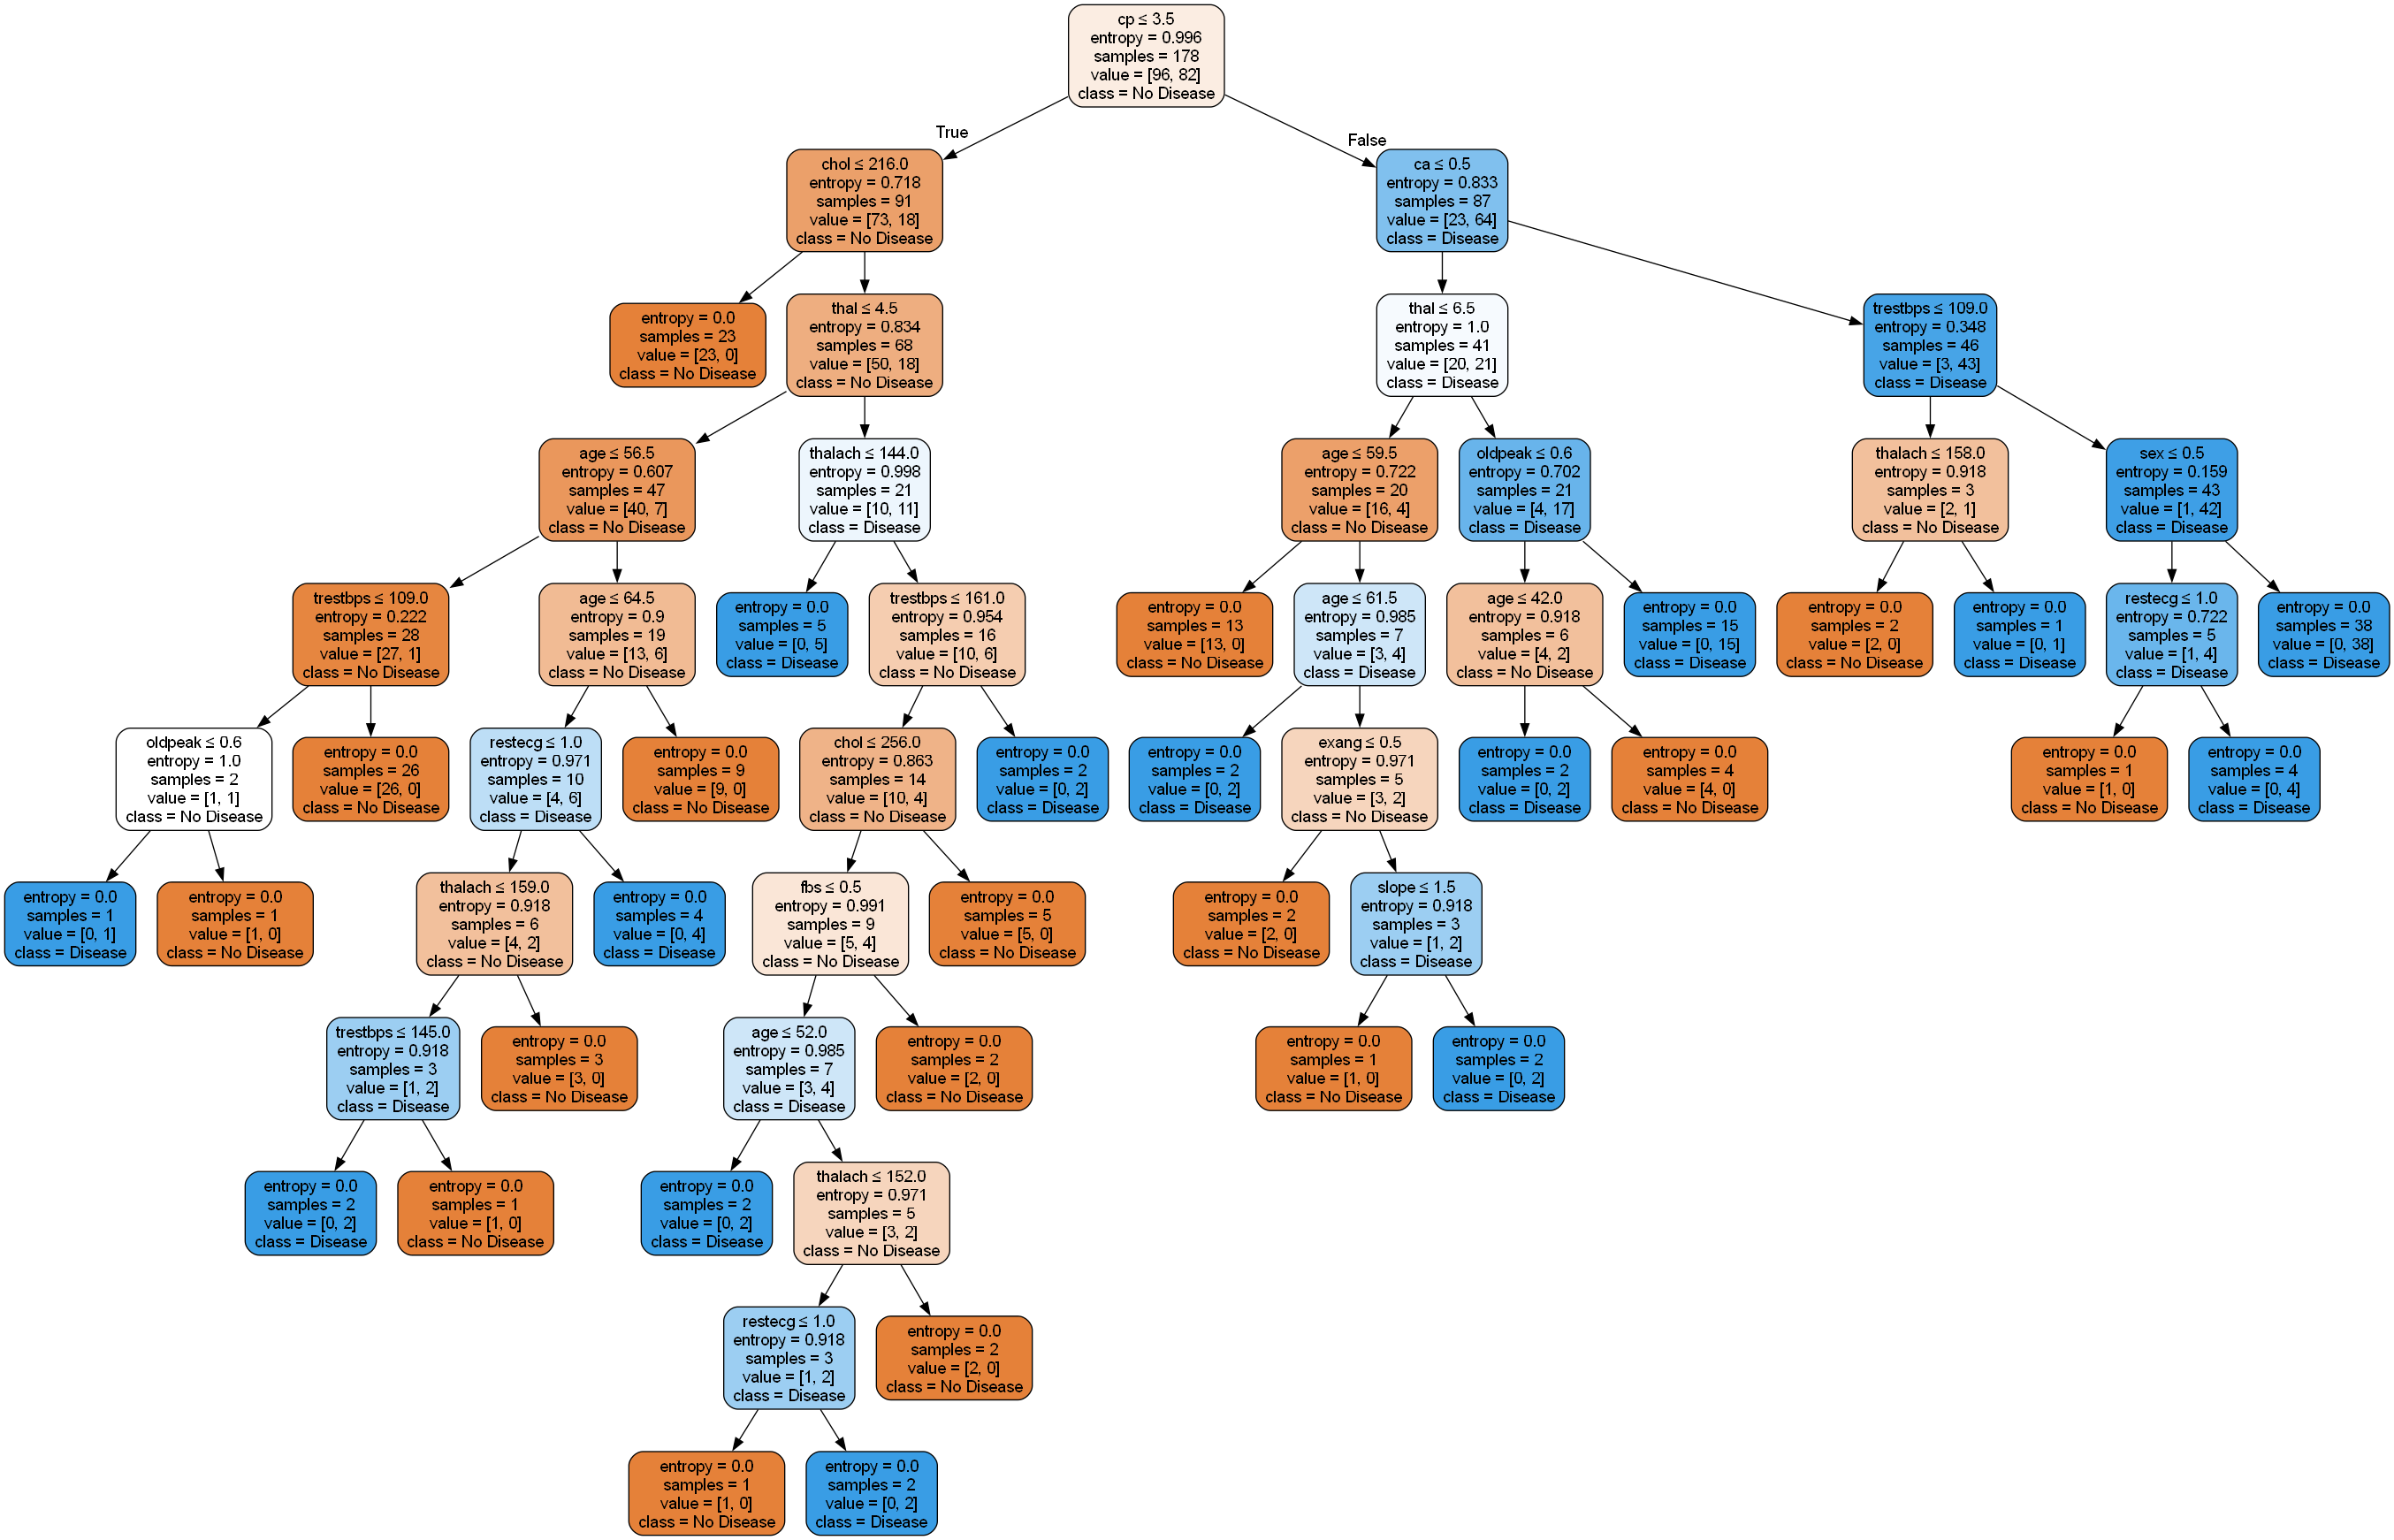

Decision tree of the model trained with split ratio 0.8/0.2


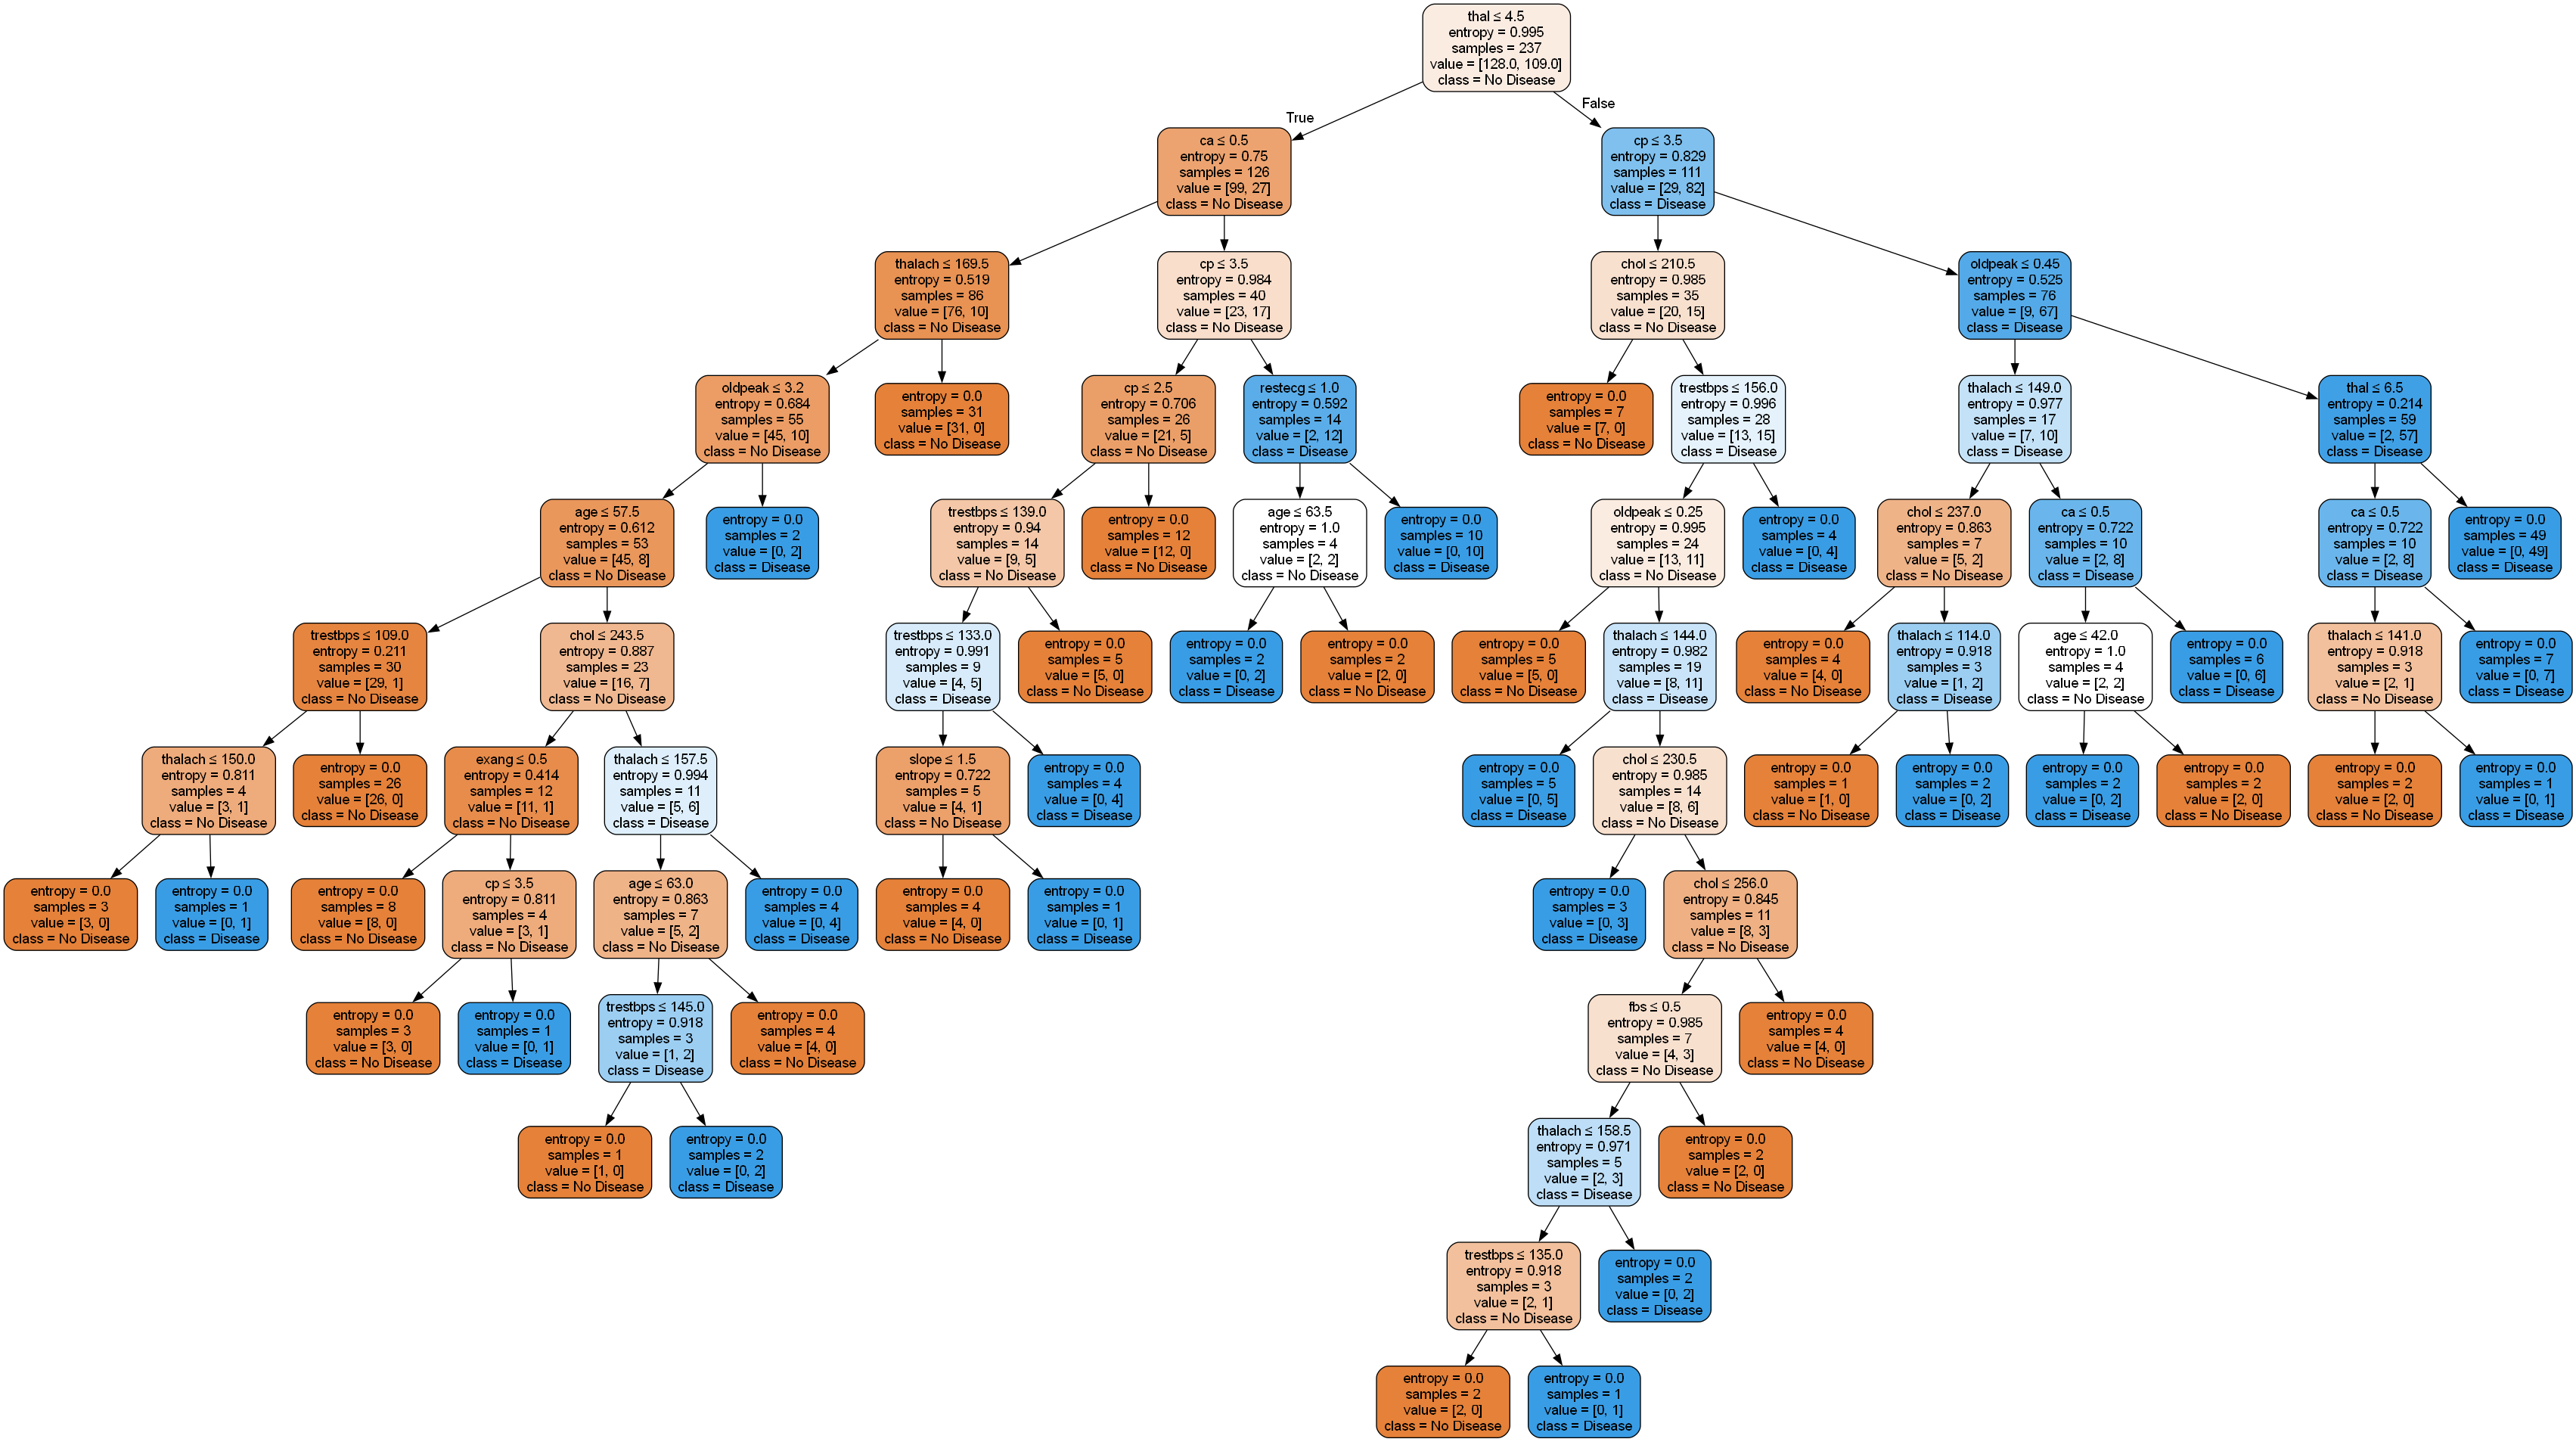

Decision tree of the model trained with split ratio 0.9/0.1


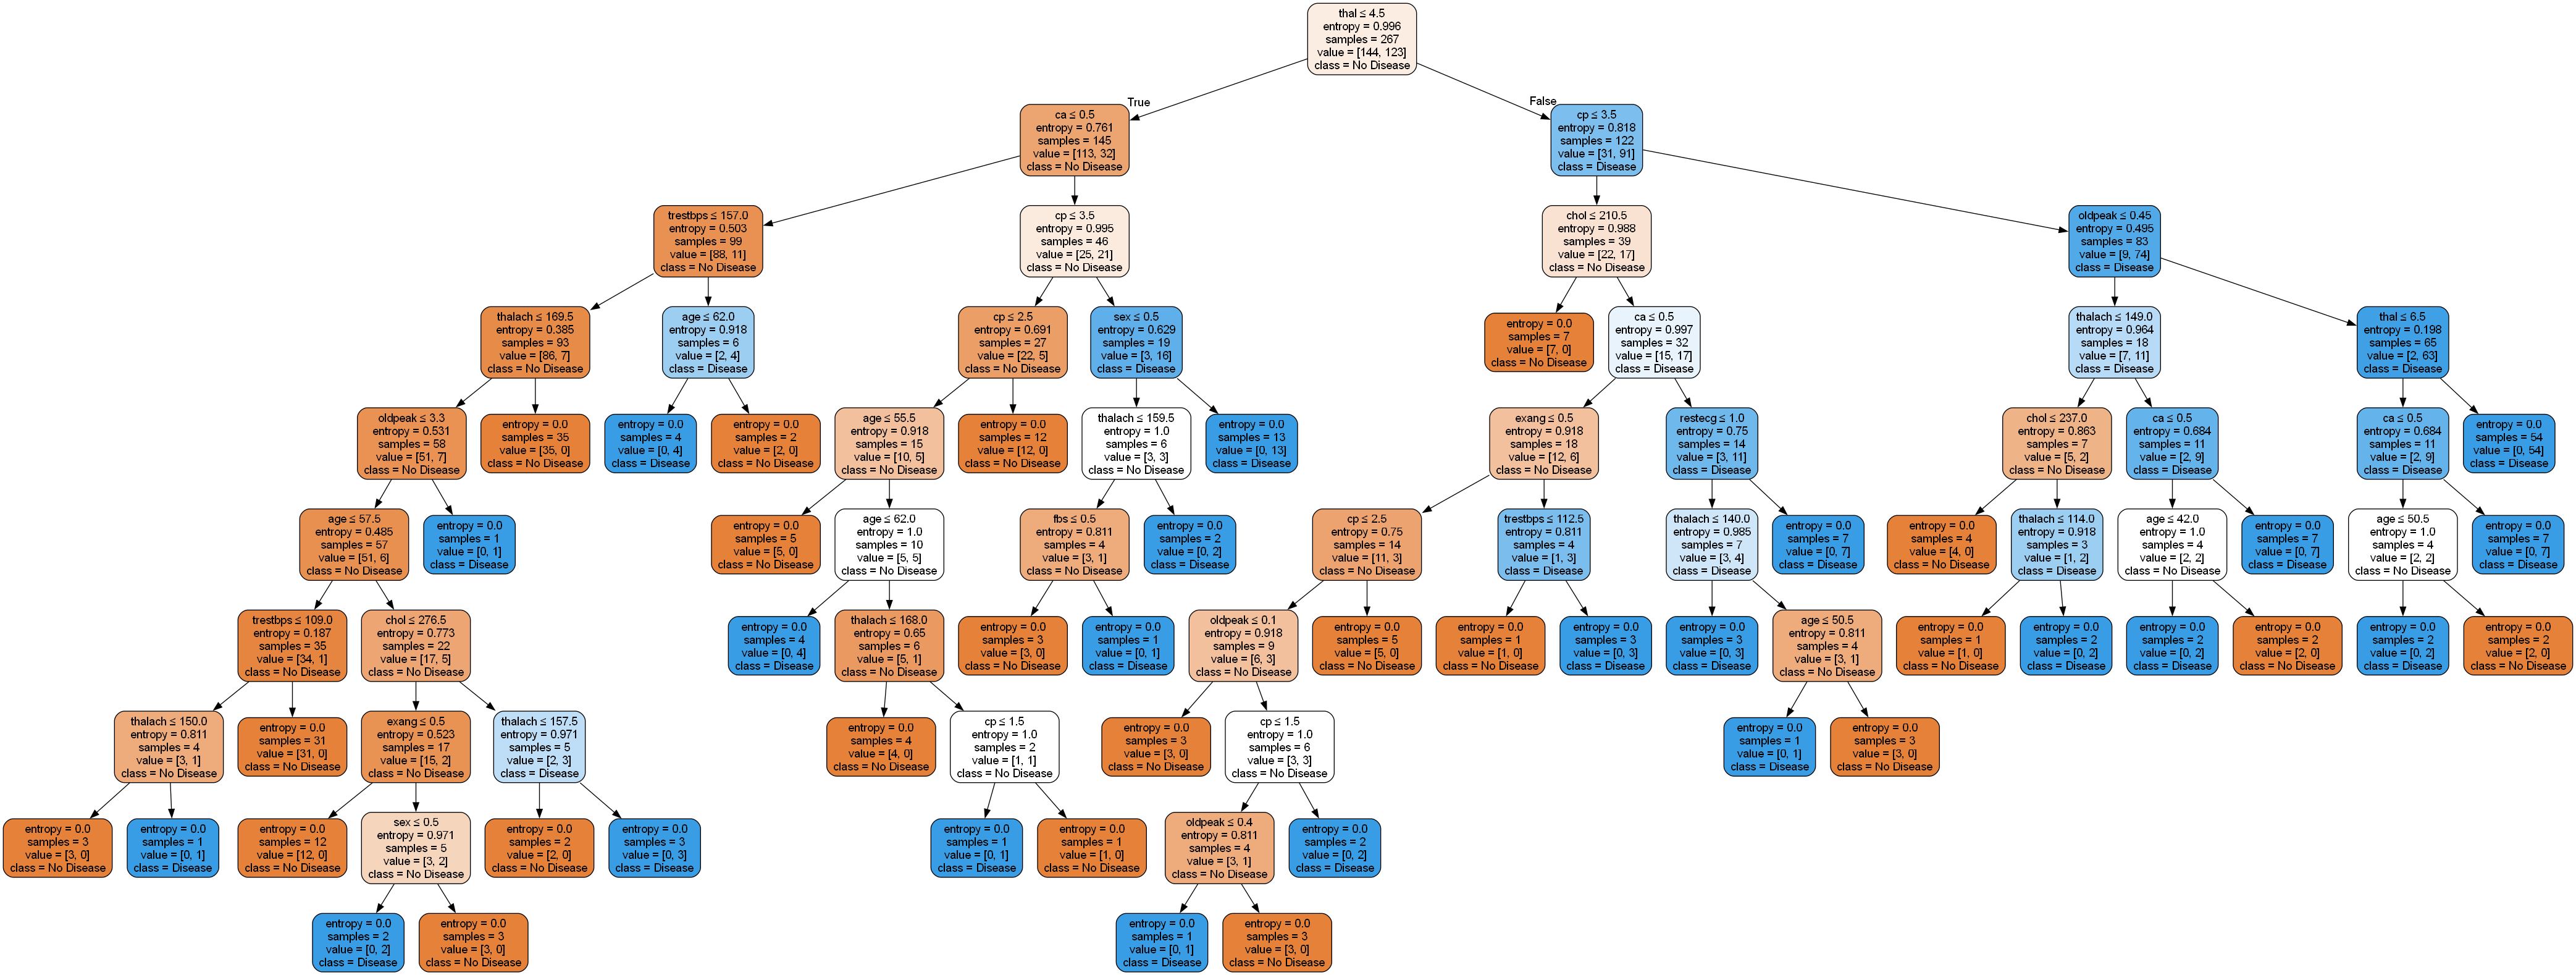

In [ ]:
for i in range(len(models)):
    print(f"Decision tree of the model trained with split ratio {split_ratios[i][0]}/{split_ratios[i][1]}")
    # Export the decision tree to DOT format
    dot_data = export_graphviz(
        models[i],  
        out_file=None,  
        feature_names=heart_disease.data.features.columns.values,  
        class_names=class_names,  
        filled=True,
        rounded=True,
        special_characters=True,
        fontname="Arial"
    )
    
    # Render the DOT file with Graphviz
    graph = Source(dot_data)
    # Visualize the tree
    graph.render(f"./tree/tree1/tree_{split_ratios[i][0]}_{split_ratios[i][1]}", 
                 format='png', 
                 cleanup=True)
    display(Image(f"./tree/tree1/tree_{split_ratios[i][0]}_{split_ratios[i][1]}.png"))

## 3. Đánh giá Decision Tree

### 3.1. Classification report & confusion matrix

Split (0.4, 0.6) Class Distribution in Test Set:
0    96
1    83
Name: count, dtype: int64
Classification Report for 0.4/0.6 Split:
              precision    recall  f1-score   support

  No Disease       0.77      0.82      0.80        96
     Disease       0.78      0.72      0.75        83

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



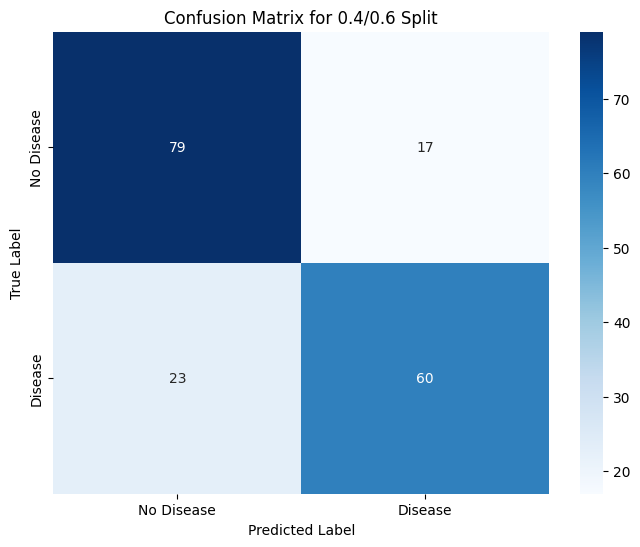

Split (0.6, 0.4) Class Distribution in Test Set:
0    64
1    55
Name: count, dtype: int64
Classification Report for 0.6/0.4 Split:
              precision    recall  f1-score   support

  No Disease       0.72      0.86      0.79        64
     Disease       0.79      0.62      0.69        55

    accuracy                           0.75       119
   macro avg       0.76      0.74      0.74       119
weighted avg       0.75      0.75      0.74       119



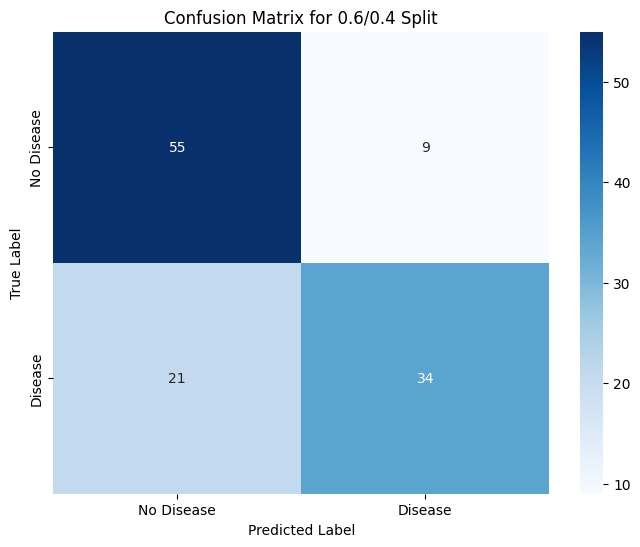

Split (0.8, 0.2) Class Distribution in Test Set:
0    32
1    28
Name: count, dtype: int64
Classification Report for 0.8/0.2 Split:
              precision    recall  f1-score   support

  No Disease       0.80      0.75      0.77        32
     Disease       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



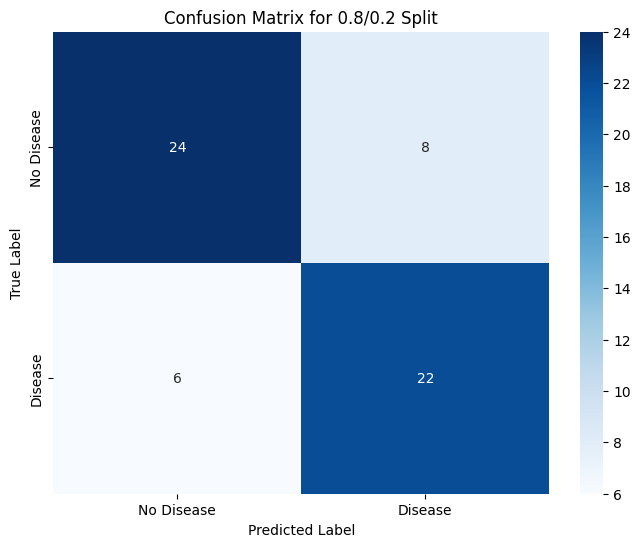

Split (0.9, 0.1) Class Distribution in Test Set:
0    16
1    14
Name: count, dtype: int64
Classification Report for 0.9/0.1 Split:
              precision    recall  f1-score   support

  No Disease       0.68      0.81      0.74        16
     Disease       0.73      0.57      0.64        14

    accuracy                           0.70        30
   macro avg       0.71      0.69      0.69        30
weighted avg       0.70      0.70      0.69        30



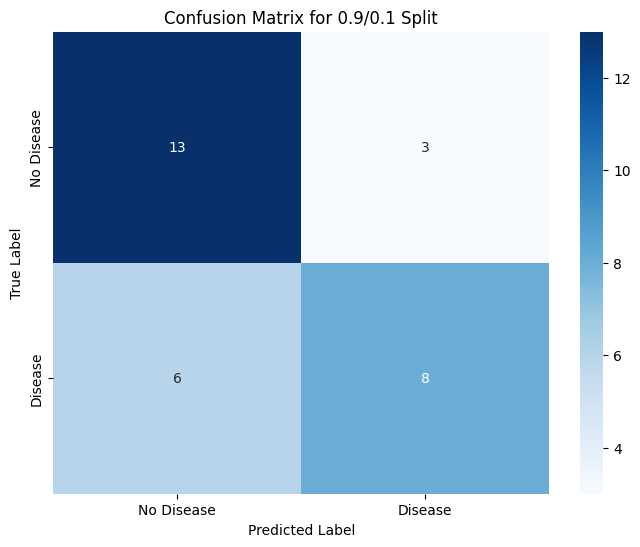

In [ ]:
# For each model and split, make predictions, generate a report, and confusion matrix
for i, subset in enumerate(subsets):
    feature_train = subset['feature_train']
    label_train = subset['label_train']
    feature_test = subset['feature_test']
    label_test = subset['label_test']
    
    # Make predictions
    label_pred = models[i].predict(feature_test)
    
    print(f"Split {split_ratios[i]} Class Distribution in Test Set:")
    print(pd.Series(label_test).value_counts())
    
    # Generate classification report
    print(f"Classification Report for {split_ratios[i][0]}/{split_ratios[i][1]} Split:")
    print(classification_report(label_test, label_pred, target_names=class_names, zero_division=0))
    
    # Generate confusion matrix
    cm = confusion_matrix(label_test, label_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix for {split_ratios[i][0]}/{split_ratios[i][1]} Split")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

### 3.2. Insights

#### 3.2.1. Tỷ lệ 40/60

- Độ chính xác: 78% trên 179 mẫu kiểm tra.
- F1-score trung bình (macro/weighted): khoảng 0.77–0.78.
- Lớp “Không bệnh”: F1-score = 0.80, recall = 0.82, mô hình nhận diện khá tốt.
- Lớp “Có bệnh”: F1-score = 0.75, recall = 0.72, vẫn còn bỏ sót khoảng 28% số bệnh nhân.
- Mô hình thiên nhẹ về lớp “Không bệnh”, nhưng vẫn duy trì hiệu suất tổng thể khá ổn định.

#### 3.2.2. Tỷ lệ 60/40


- Độ chính xác: 75% trên 119 mẫu kiểm tra.
- Lớp “Không bệnh”: recall cao (0.86), cho thấy mô hình phát hiện tốt các ca không bệnh.
- Lớp “Có bệnh”: recall giảm còn 0.62, mô hình bỏ sót nhiều hơn so với tỷ lệ 40/60.
- F1-score cả hai lớp đều giảm nhẹ, hiệu suất không được cải thiện rõ dù tăng dữ liệu huấn luyện.
- Mô hình có xu hướng thiên về lớp “Không bệnh”, cần điều chỉnh để cân bằng hơn.

#### 3.2.3. Tỷ lệ 80/20

- Độ chính xác: 77% trên 60 mẫu kiểm tra.
- Lớp “Không bệnh”: F1-score = 0.77.
- Lớp “Có bệnh”: recall cải thiện rõ rệt lên 0.79 → mô hình phát hiện nhiều bệnh nhân hơn.
- Mô hình duy trì được độ chính xác tốt, F1-score hai lớp cân bằng hơn.
- Đây là tỷ lệ có hiệu suất ổn định và hiệu quả nhất trong các thử nghiệm.

#### 3.2.4. Tỷ lệ 90/10

- Độ chính xác: 70% trên 30 mẫu kiểm tra – thấp nhất trong 4 tỷ lệ.
- Lớp “Không bệnh”: recall = 0.81, precision giảm còn 0.68, dễ nhầm lẫn.
- Lớp “Có bệnh”: recall chỉ đạt 0.57, gần một nửa số bệnh nhân không được phát hiện.
- F1-score dao động từ 0.64–0.74, cho thấy độ ổn định không cao.
- Kích thước test set nhỏ gây nhiễu trong đánh giá, không phản ánh đúng hiệu suất thực tế.

## 4. Độ sâu (depth) và độ chính xác (accuracy) của Decision Tree

### 4.1 Visualization

Decision tree of the model trained with split ratio 80/20 and max depth None


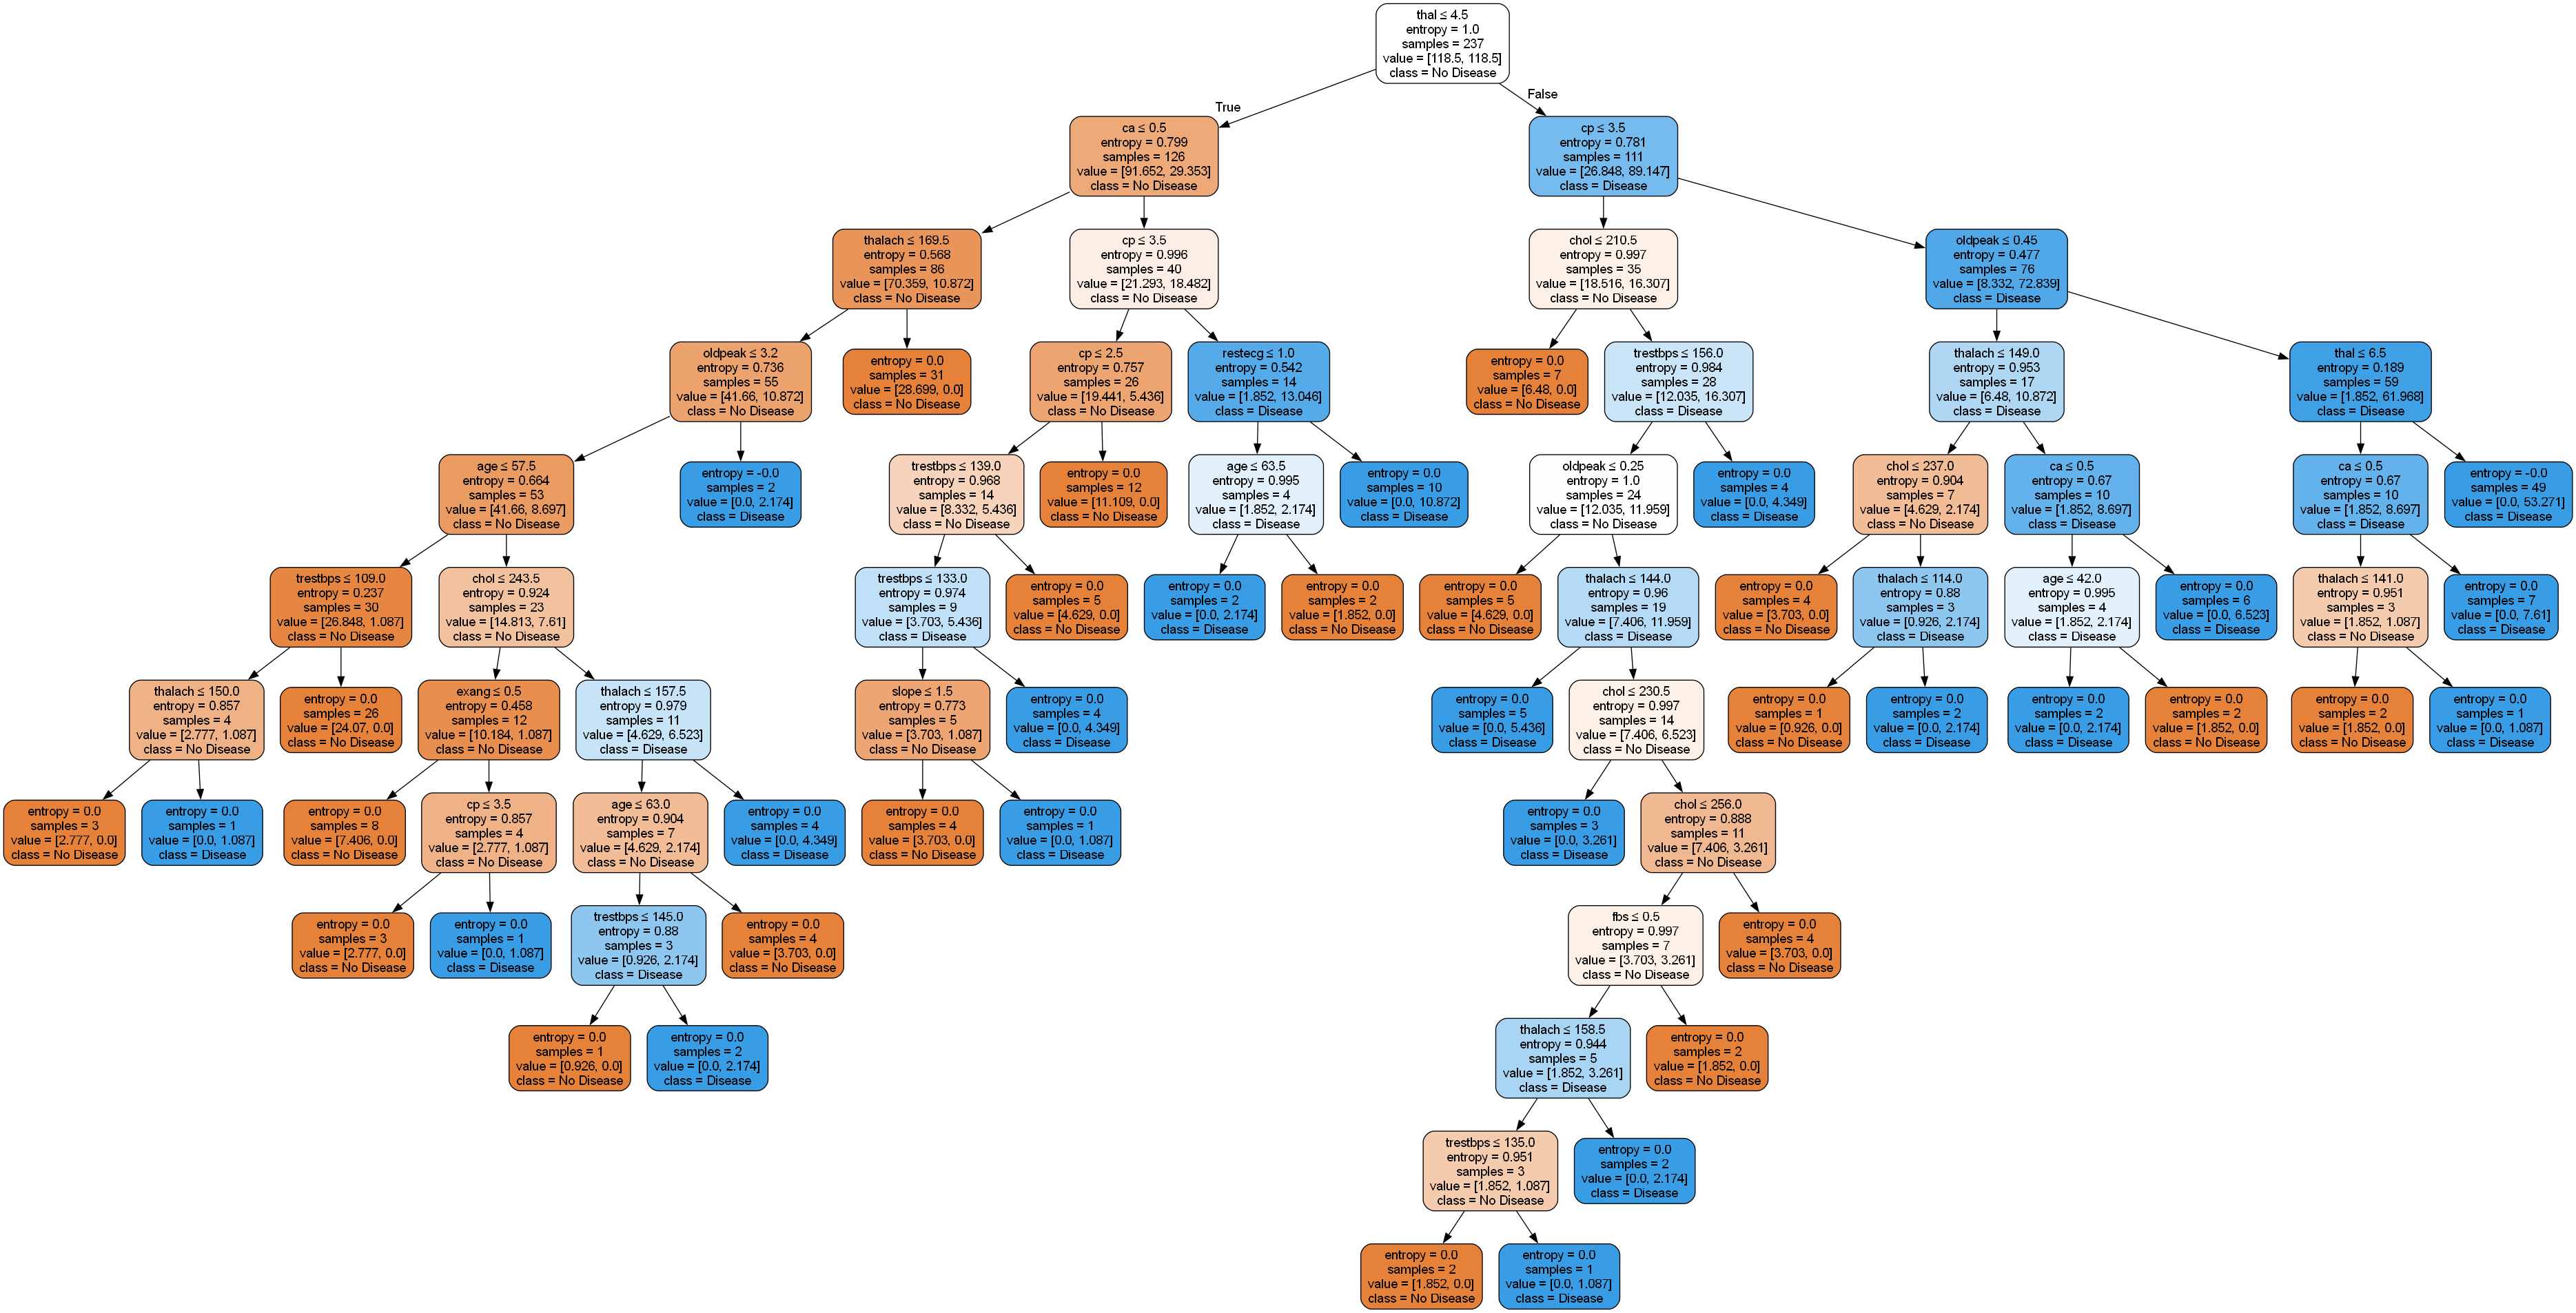

Accuracy for max_depth None: 0.7667
Decision tree of the model trained with split ratio 80/20 and max depth 2


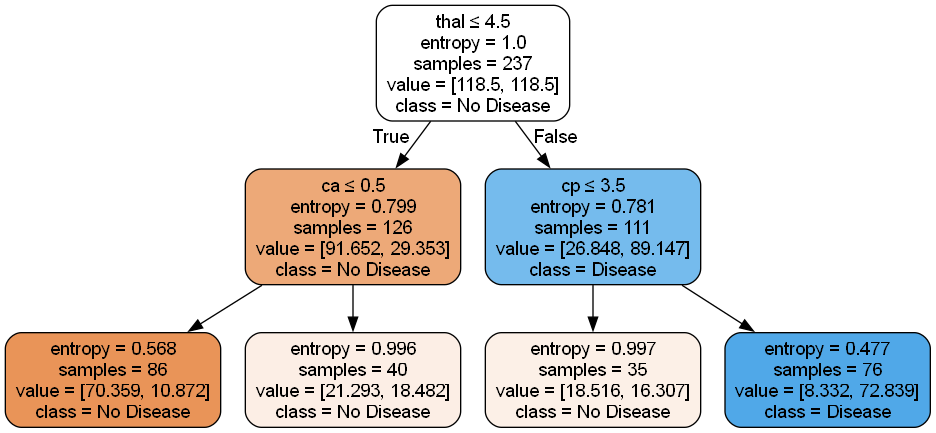

Accuracy for max_depth 2: 0.7167
Decision tree of the model trained with split ratio 80/20 and max depth 3


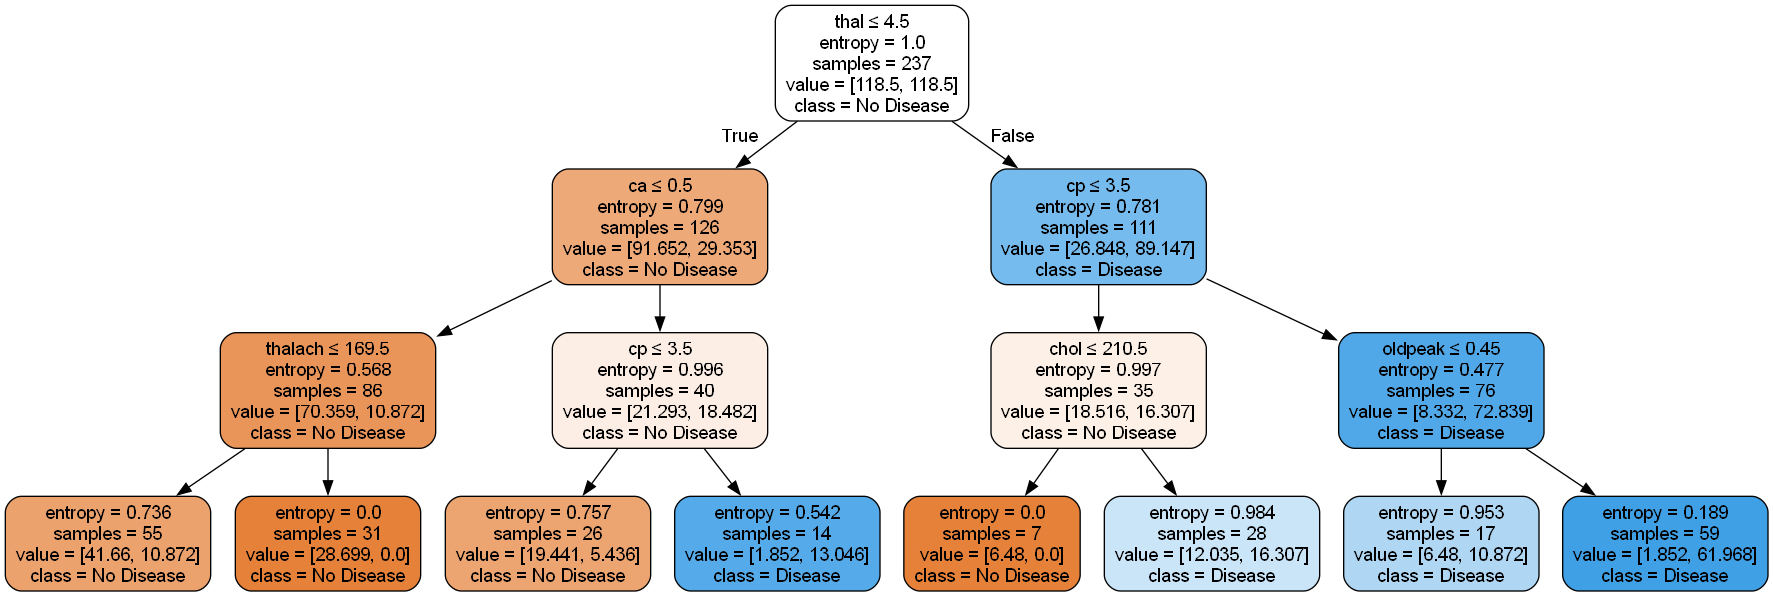

Accuracy for max_depth 3: 0.8167
Decision tree of the model trained with split ratio 80/20 and max depth 4


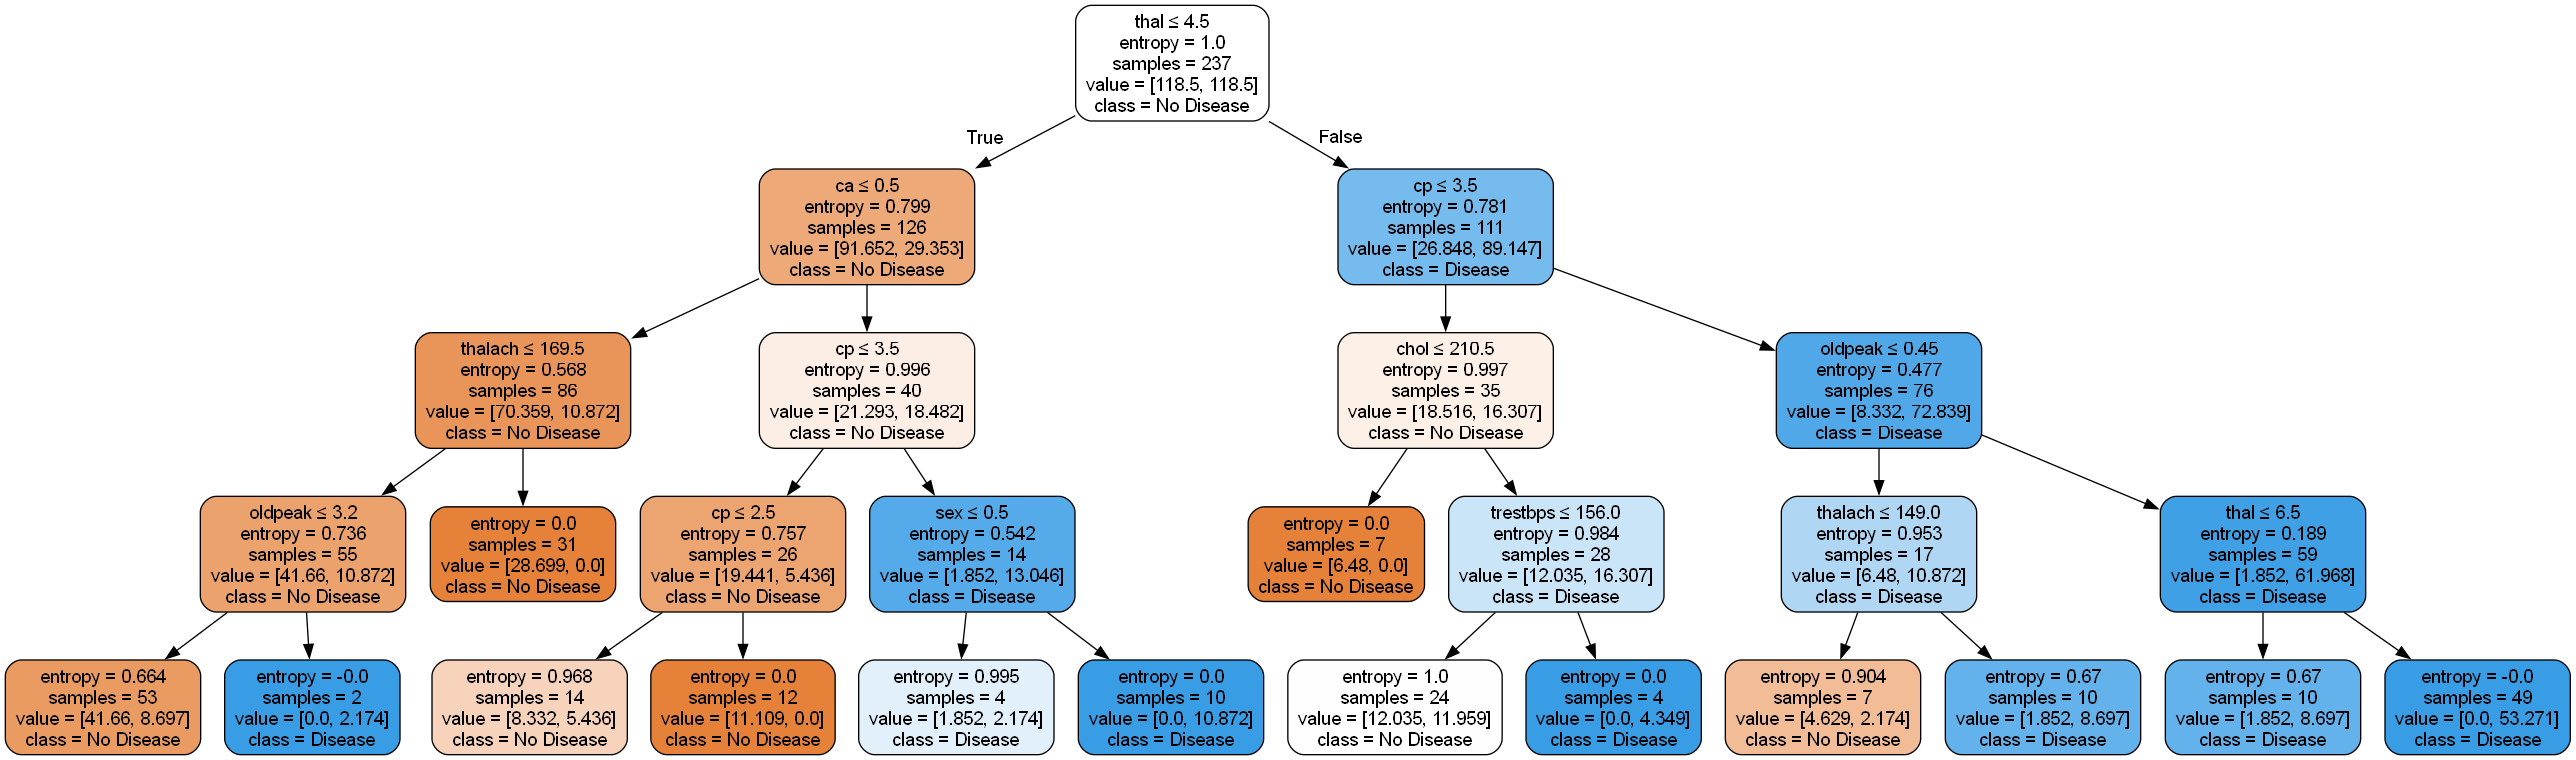

Accuracy for max_depth 4: 0.7667
Decision tree of the model trained with split ratio 80/20 and max depth 5


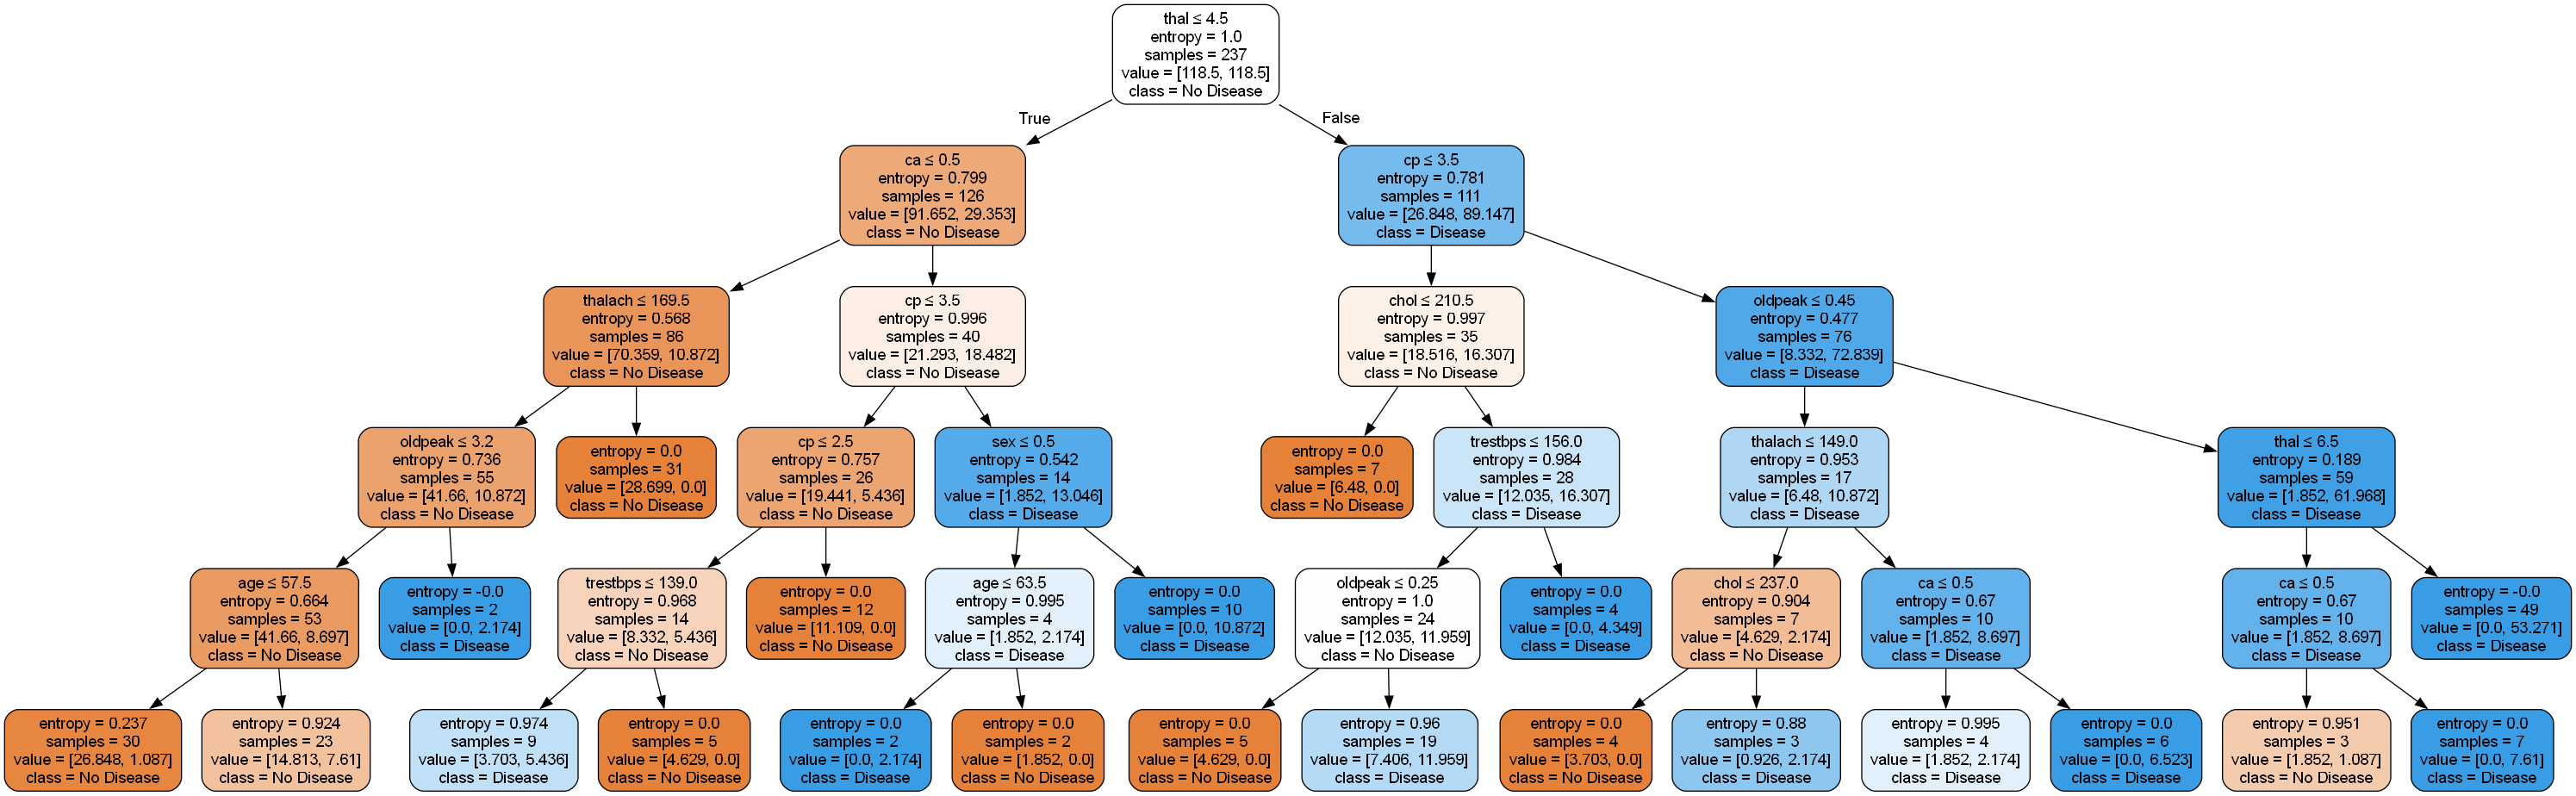

Accuracy for max_depth 5: 0.7833
Decision tree of the model trained with split ratio 80/20 and max depth 6


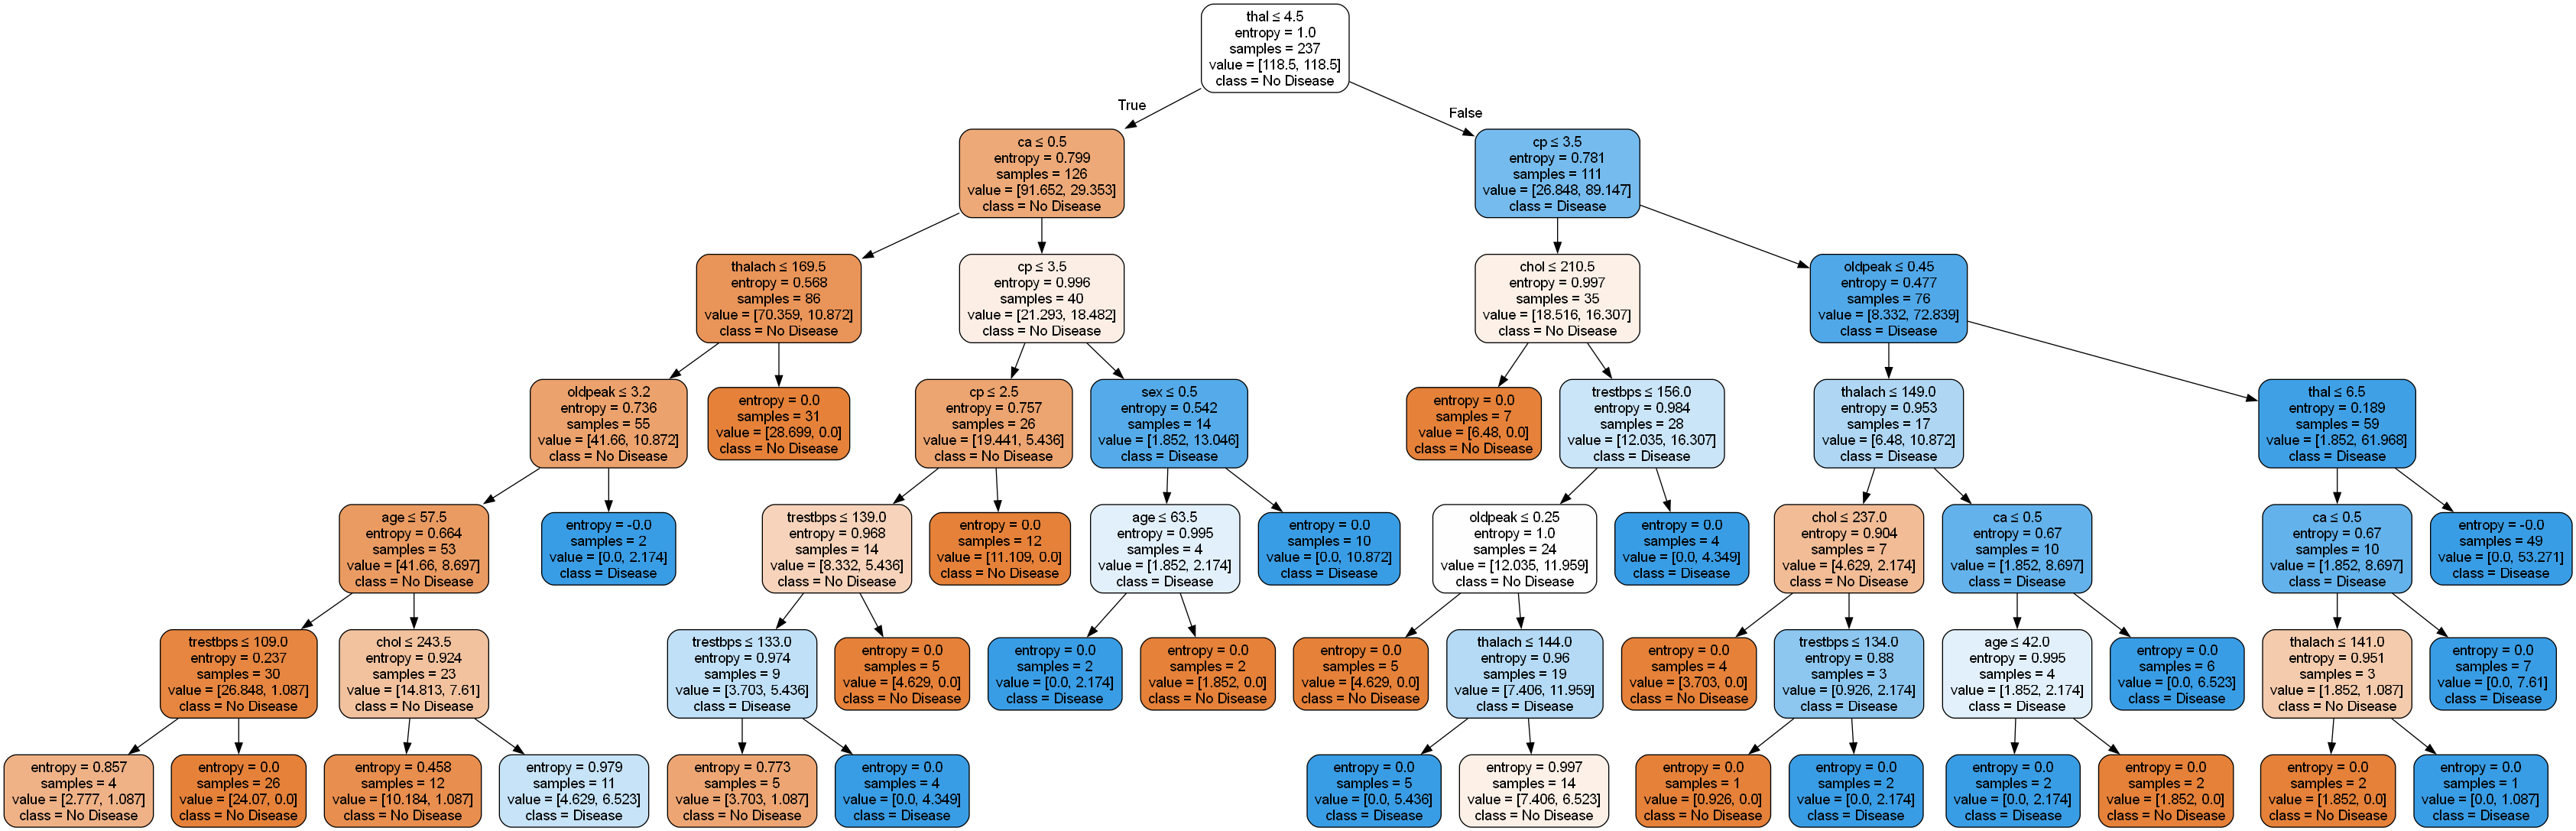

Accuracy for max_depth 6: 0.7333
Decision tree of the model trained with split ratio 80/20 and max depth 7


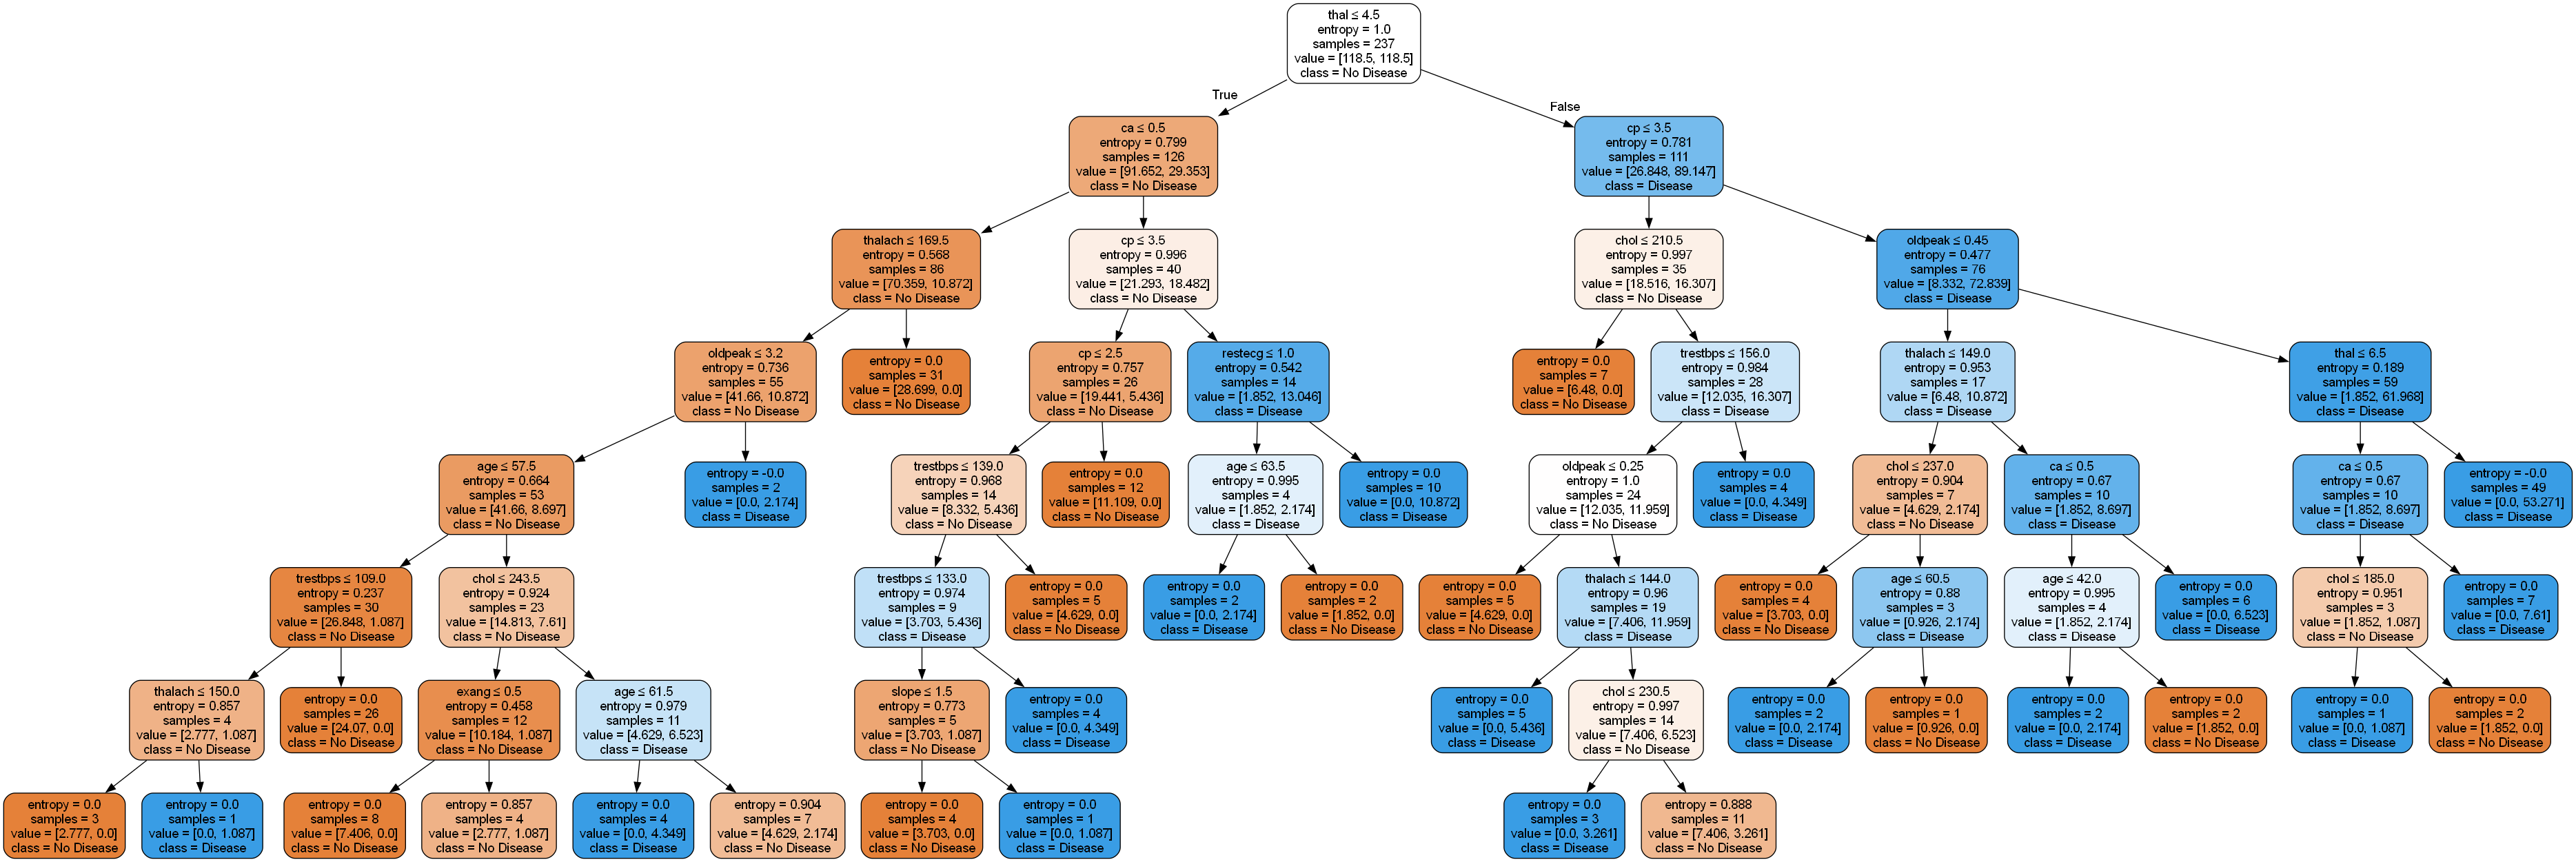

Accuracy for max_depth 7: 0.7667


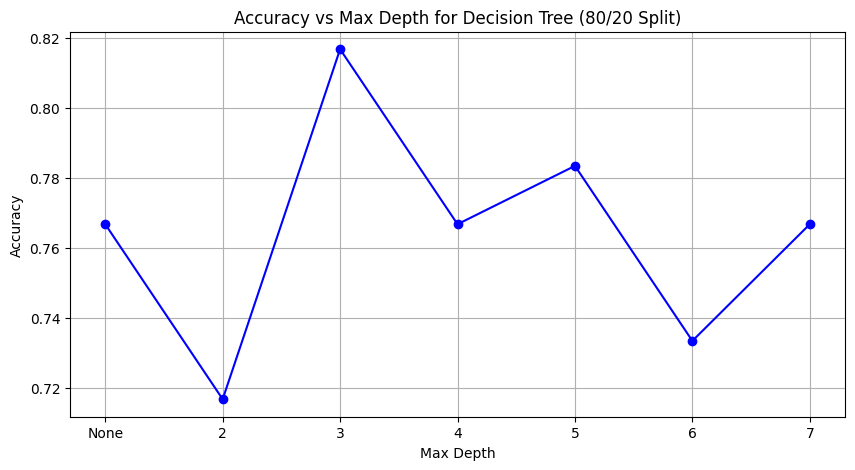

In [19]:
# Select the 80/20 split (index 2 in split_ratios)
subset_80_20 = subsets[2]
feature_train_80_20 = subset_80_20['feature_train']
label_train_80_20 = subset_80_20['label_train']
feature_test_80_20 = subset_80_20['feature_test']
label_test_80_20 = subset_80_20['label_test']

accuracy_scores = []
depths = [None, 2, 3, 4, 5, 6, 7]

for depth in depths:
    model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth, class_weight='balanced')
    model.fit(feature_train_80_20, label_train_80_20)

    print(f"Decision tree of the model trained with split ratio 80/20 and max depth {depth}")
    # Export the decision tree to DOT format
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=heart_disease.data.features.columns,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True,
        fontname="Arial"
    )
    
    # Render the DOT file with Graphviz
    graph = Source(dot_data)
    # Visualize the tree
    graph.render(f"./tree_80_20/tree1/tree_{depth}", 
                 format='png', 
                 cleanup=True)
    display(Image(filename=f"./tree_80_20/tree1/tree_{depth}.png"))

    # Make predictions and calculate accuracy
    pred = model.predict(feature_test_80_20)
    accuracy = accuracy_score(label_test_80_20, pred)
    print(f"Accuracy for max_depth {depth}: {accuracy:.4f}")
    accuracy_scores.append(accuracy)

# Plot the results
depths_for_plot = [str(d) if d is not None else 'None' for d in depths]
plt.figure(figsize=(10, 5))
plt.plot(depths_for_plot, accuracy_scores, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs Max Depth for Decision Tree (80/20 Split)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths_for_plot)
plt.grid(True)
plt.show()

### 4.2. Insights

| max_depth | None  | 2     | 3     | 4     | 5     | 6     | 7     |
|-----------|-------|-------|-------|-------|-------|-------|-------|
| Accuracy  | 0.7667| 0.7167| 0.8167| 0.7667| 0.7833| 0.7333| 0.7667|

- Độ chính xác cao nhất (~81.67%) đạt được khi giới hạn **max_depth = 3**.
- Khi **max_depth = None**, độ chính xác đạt ~76.67%, tương đương với độ sâu 4 và 7.
- Với **max_depth = 2**, mô hình underfitting rõ rệt (độ chính xác chỉ ~71.67%).
- **max_depth = 5** cho kết quả khá tốt (~78.33%), nhưng vẫn thấp hơn độ sâu 3.
- **max_depth = 6** có hiệu suất thấp nhất (~73.33%), cho thấy overfitting nghiêm trọng.
- **Kết luận:** Độ sâu = 3 là tối ưu nhất với accuracy 81.67%, cân bằng giữa khả năng học và tránh overfitting.